# Machine Learning Intro (sentiment analysis)

## Initialization

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## Getting and Labelling the Data

In [2]:
filepath_dict = {'yelp':   'data/yelp_labelled.txt',
                 'amazon': 'data/amazon_cells_labelled.txt',
                 'imdb':   'data/imdb_labelled.txt'}
df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  
    df_list.append(df)

df = pd.concat(df_list)

## Defining a Baseline Model (YELP)

In [3]:
df_yelp = df[df['source'] == 'yelp']
X = df_yelp['sentence'].values
Y = df_yelp['label'].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=10)

In [5]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [6]:
transformed_X_train = vectorizer.transform(x_train)
transformed_X_test  = vectorizer.transform(x_test)
transformed_X_train

<750x1709 sparse matrix of type '<class 'numpy.int64'>'
	with 7358 stored elements in Compressed Sparse Row format>

In [7]:
classifier = LogisticRegression()
classifier.fit(transformed_X_train, y_train)
score_yelp = classifier.score(transformed_X_test, y_test)
print("Accuracy:", score_yelp)

Accuracy: 0.828


## Keras Model (YELP)

In [8]:
input_dim = transformed_X_train.shape[1]
from keras.models import Sequential
from keras import layers

2021-11-21 14:44:23.671419: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-21 14:44:23.671459: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2021-11-21 14:44:24.804346: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-21 14:44:24.804428: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-21 14:44:24.804477: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-V04RM6SF): /proc/driver/nvidia/version does not exist
2021-11-21 14:44:24.804744: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                17100     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,111
Trainable params: 17,111
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(transformed_X_train, y_train,
...                     epochs=100,
...                     verbose=False,
...                     validation_data=(transformed_X_test, y_test),
...                     batch_size=10)

/home/abdallah-alabed/text-classifier/.venv/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
loss, accuracy = model.evaluate(transformed_X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(transformed_X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8280


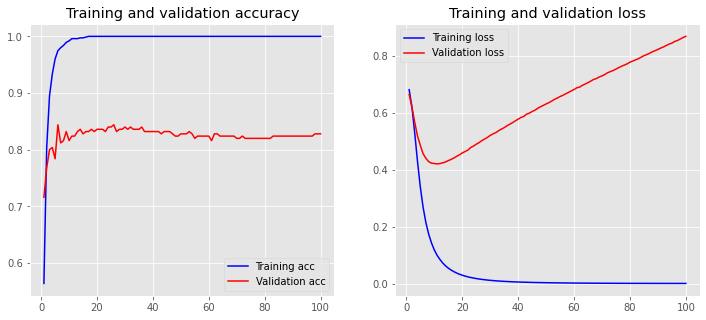

In [14]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

## Defining a Baseline Model (IMDB)

In [15]:
df_imdb = df[df['source'] == 'imdb']
X_imdb = df_imdb['sentence'].values
Y_imdb = df_imdb['label'].values

In [16]:
x_imdb_train, x_imdb_test, y_imdb_train, y_imdb_test = train_test_split(X_imdb,Y_imdb, test_size=0.25, random_state=10)
vectorizer = CountVectorizer()
vectorizer.fit(x_imdb_train)

CountVectorizer()

In [17]:
transformed_X_imdb_train = vectorizer.transform(x_imdb_train)
transformed_X_imdb_test  = vectorizer.transform(x_imdb_test)
transformed_X_imdb_train

<561x2663 sparse matrix of type '<class 'numpy.int64'>'
	with 8936 stored elements in Compressed Sparse Row format>

In [18]:
# classifier = LogisticRegression()
classifier.fit(transformed_X_imdb_train, y_imdb_train)
score_imdb = classifier.score(transformed_X_imdb_test, y_imdb_test)
print("Accuracy:", score_imdb)

Accuracy: 0.786096256684492


## Keras Model (IMDB)

In [19]:
input_dim = transformed_X_imdb_train.shape[1]
from keras.models import Sequential
from keras import layers

In [20]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                26640     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 26,651
Trainable params: 26,651
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(transformed_X_imdb_train, y_imdb_train,
...                     epochs=100,
...                     verbose=False,
...                     validation_data=(transformed_X_imdb_test, y_imdb_test),
...                     batch_size=10)

/home/abdallah-alabed/text-classifier/.venv/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


In [23]:
from keras.backend import clear_session
clear_session()

In [24]:
loss, accuracy = model.evaluate(transformed_X_imdb_train, y_imdb_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(transformed_X_imdb_test, y_imdb_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8235


In [25]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

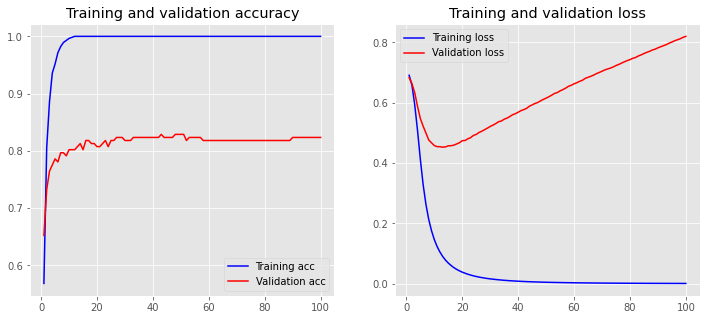

In [26]:
plot_history(history)

## Defining a Baseline Model (AMAZON)

In [27]:
df_amz = df[df['source'] == 'amazon']
X_amz = df_amz['sentence'].values
Y_amz = df_amz['label'].values

In [28]:
x_amz_train, x_amz_test, y_amz_train, y_amz_test = train_test_split(X_amz,Y_amz, test_size=0.25, random_state=100)
vectorizer = CountVectorizer()
vectorizer.fit(x_amz_train)

CountVectorizer()

In [29]:
transformed_X_amz_train = vectorizer.transform(x_amz_train)
transformed_X_amz_test  = vectorizer.transform(x_amz_test)
transformed_X_amz_train

<750x1551 sparse matrix of type '<class 'numpy.int64'>'
	with 6870 stored elements in Compressed Sparse Row format>

In [30]:
# classifier = LogisticRegression()
classifier.fit(transformed_X_amz_train, y_amz_train)
score_amz = classifier.score(transformed_X_amz_test, y_amz_test)
print("Accuracy:", score_amz)

Accuracy: 0.82


## Keras Model (AMAZON)

In [31]:
input_dim = transformed_X_amz_train.shape[1]
from keras.models import Sequential
from keras import layers

In [32]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                15520     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,531
Trainable params: 15,531
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(transformed_X_amz_train, y_amz_train,
...                     epochs=100,
...                     verbose=False,
...                     validation_data=(transformed_X_amz_test, y_amz_test),
...                     batch_size=10)

/home/abdallah-alabed/text-classifier/.venv/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


In [35]:
from keras.backend import clear_session
clear_session()

In [36]:
loss, accuracy = model.evaluate(transformed_X_amz_train, y_amz_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(transformed_X_amz_test, y_amz_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8600


In [37]:
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    

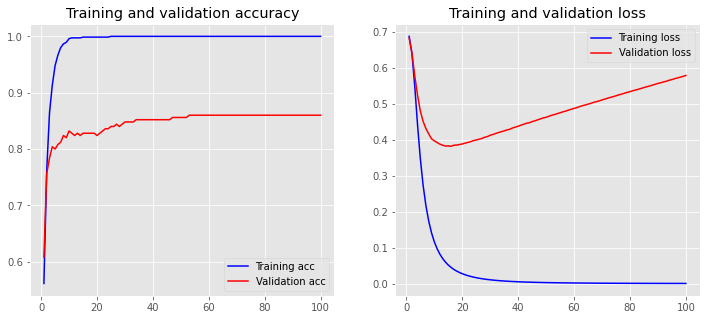

In [38]:
plot_history(history)